<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/MBAIA/8DTSR/8DTSR_aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1. "Re"distribuição de dados (de uma variável)

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Carga de dados
fm = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/db_Exercicio_RFM.csv')
fm

,Unnamed: 0,CUSTOMER_ID,STORE_ID,PRODUCT_ID,AMOUNT,DATE
0,1,95595791691,409,196282,8.98,2020-01-01 00:14:41 UTC
1,2,8814812624,62,136956,0.00,2020-01-01 00:10:16 UTC
2,3,38552620634,408,329,9.98,2020-01-01 00:08:29 UTC
3,4,11561694614,405,104089,7.99,2020-01-01 00:06:10 UTC
4,5,1216506698,62,196180,11.96,2020-01-01 00:05:30 UTC
...,...,...,...,...,...,...
92289,92290,10264569679,417,160178,2.15,2019-11-08 10:29:32 UTC
92290,92291,74199480625,405,194991,2.99,2019-11-08 10:29:22 UTC
92291,92292,60400722615,415,185621,4.30,2019-11-08 10:27:06 UTC
92292,92293,3623837660,65,193506,6.29,2019-11-08 10:16:58 UTC


<Axes: xlabel='sum', ylabel='count'>

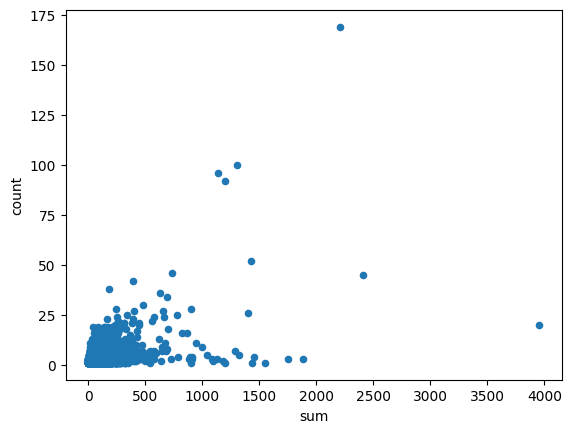

In [6]:
fmAgg = fm.groupby(by=['CUSTOMER_ID'])['AMOUNT'].agg(['sum', 'count'])

fmAgg.plot.scatter(x='sum', y='count')

array([[<Axes: title={'center': 'count'}>]], dtype=object)

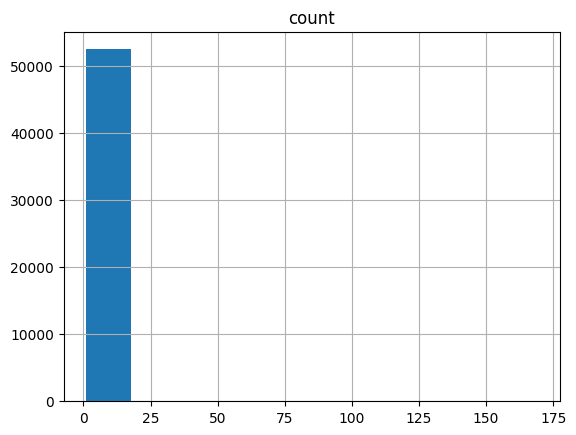

In [7]:
# Analisando a distribuição da variável "F" - ou seja frequência de compra
fmAgg.hist('count')

array([[<Axes: title={'center': 'sum'}>]], dtype=object)

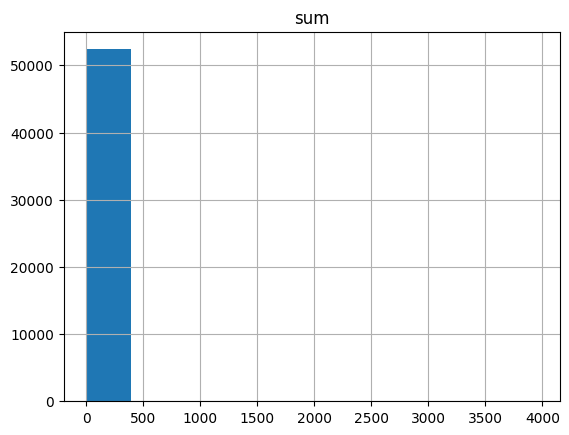

In [8]:
# Analisando a distribuição da variável "M" - ou seja valor total de compra
fmAgg.hist('sum')

In [ ]:
# Conclusão: variáveis (count e sum | f e M) tem uma "densidade" alta, ou seja, os dados estão muito concentrados
#

array([[<Axes: title={'center': 'sum_log'}>]], dtype=object)

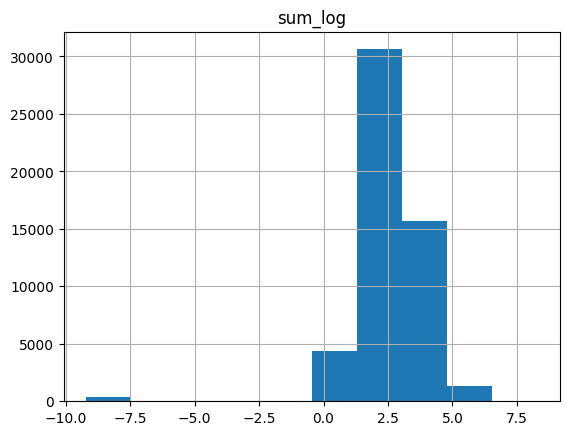

In [18]:
# Aplicação do Log para redistribuir os valores

sum_log = fmAgg['sum'].values
sum_log[sum_log==0]=0.0001
# preenchi linhas com valor 0, inserindo um valor ínfimo para que o cálculo do log não retornasse um valor inválido

sum_log = np.log(sum_log)
count_log = np.log(fmAgg['count'])

fmAgg['sum_log'] = sum_log
fmAgg['count_log'] = count_log

fmAgg.hist('sum_log')

array([[<Axes: title={'center': 'count_log'}>]], dtype=object)

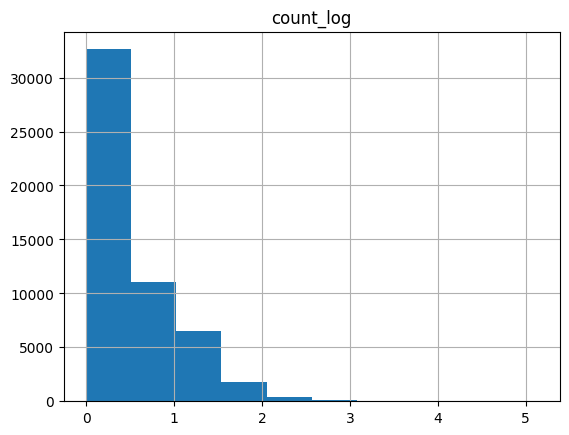

In [19]:
fmAgg.hist('count_log')

# Parte 2 - Variáveis Categóricas

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')

# Construção variável dummy (feature de variável categórica)
dummy_sex = pd.get_dummies(df['Sex'])

df['Sex_female'] = dummy_sex['female']

dummy_pclass = pd.get_dummies(df['Pclass'], prefix='Class')
df['Class_1'] = dummy_pclass['Class_1']
df['Class_2'] = dummy_pclass['Class_2']

df['Women_or_Children'] = np.where(
  df['Age']<14,
  1,
  np.where(
      df['Sex_female']==1,
      1,
      0
  )
)

# Parte 2.1 - Discretização (transformação em faixas => categoria)

In [37]:
di = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/diamonds.csv')


array([[<Axes: title={'center': 'price'}>]], dtype=object)

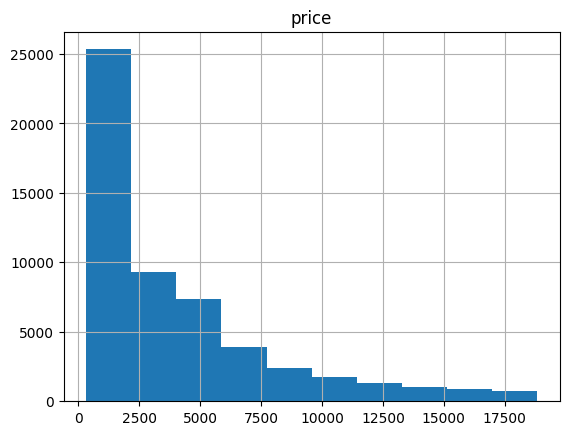

In [39]:
di.hist('price')

In [42]:
# Análise de distribuição de quartis
di[['price']].quantile(np.arange(0,1,.25))

,price
0.00,326.00
0.25,950.00
0.50,2401.00
0.75,5324.25


In [53]:
# Discretização por frequência
from sklearn.preprocessing import KBinsDiscretizer

disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
disc.fit(di[['price']])

di_transformed = disc.transform(di[['price']])

di['Price_Discretized'] = di_transformed
di.groupby('Price_Discretized').count()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
Price_Discretized,,,,,,,,,,,
0.0,13483,13483,13483,13483,13483,13483,13483,13483,13483,13483,13483
1.0,13476,13476,13476,13476,13476,13476,13476,13476,13476,13476,13476
2.0,13496,13496,13496,13496,13496,13496,13496,13496,13496,13496,13496
3.0,13485,13485,13485,13485,13485,13485,13485,13485,13485,13485,13485


In [55]:
# Discretização por mesma largura
!pip install feature_engine

In [56]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [60]:
discW = EqualWidthDiscretiser(variables='price', bins=4, return_boundaries=True)
discW.fit(di)
di_transformedW = discW.transform(di)
di_transformedW.groupby('price').count()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,Price_Discretized
price,,,,,,,,,,,
"(-inf, 4950.25]",39013,39013,39013,39013,39013,39013,39013,39013,39013,39013,39013
"(14198.75, inf]",2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068
"(4950.25, 9574.5]",9285,9285,9285,9285,9285,9285,9285,9285,9285,9285,9285
"(9574.5, 14198.75]",3574,3574,3574,3574,3574,3574,3574,3574,3574,3574,3574


# 3. Feature Importance

3.1 Magnitude dos coeficientes

In [67]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression

X = df[['Sex_female', 'Class_1', 'Class_2', 'Women_or_Children']]
y = df['Survived']

modLR = LogisticRegression()
modLR.fit(X, y)

print(mod.coef_)

[[0.65005199 1.97505583 1.01292257 2.1816799 ]]


3.2 Decision Split (aplicável a modelos de árvore)

In [68]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

modRF = RandomForestClassifier()
modRF.fit(X, y)

print(modRF.feature_importances_, modRF.feature_names_in_)


[0.31408447 0.17144908 0.09112327 0.42334317] ['Sex_female' 'Class_1' 'Class_2' 'Women_or_Children']


<Axes: >

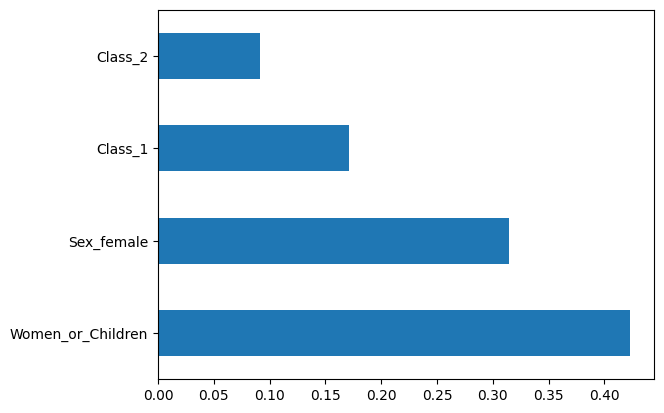

In [69]:
# Visualização Gráfica
feature_importance = pd.Series(modRF.feature_importances_, modRF.feature_names_in_)
feature_importance.nlargest(4).plot(kind='barh')